# Negative Volume Index (NVI)

https://stockcharts.com/school/doku.php?id=chart_school:technical_indicators:negative_volume_inde

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2020-01-01'
end = '2023-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02 00:00:00-05:00,74.059998,75.150002,73.797501,75.087502,73.449394,135480400
2020-01-03 00:00:00-05:00,74.287498,75.144997,74.125000,74.357498,72.735321,146322800
2020-01-06 00:00:00-05:00,73.447502,74.989998,73.187500,74.949997,73.314880,118387200
2020-01-07 00:00:00-05:00,74.959999,75.224998,74.370003,74.597504,72.970085,108872000
2020-01-08 00:00:00-05:00,74.290001,76.110001,74.290001,75.797501,74.143890,132079200


In [3]:
df['ROC'] = ((df['Adj Close'] - df['Adj Close'].shift(1))/df['Adj Close'].shift(1)) * 100
df['ROC_Volume'] = ((df['Volume'] - df['Volume'].shift(1))/df['Volume'].shift(1)) * 100
df['NVI_Value'] = 0
df['NVI_Cumulative'] = 0
df1 = df[df['ROC_Volume']<0]
df1['NVI_Value'] = df1['ROC']
df[df['ROC_Volume']<0] = df1
df['NVI_Cumulative'] = 1000+df['NVI_Value'].cumsum()

In [4]:
# Drop Columns
df = df.drop(['ROC','ROC_Volume'],axis=1)

In [5]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,NVI_Value,NVI_Cumulative
Date,,,,,,,,
2020-01-02 00:00:00-05:00,74.059998,75.150002,73.797501,75.087502,73.449394,135480400,0.000000,1000.000000
2020-01-03 00:00:00-05:00,74.287498,75.144997,74.125000,74.357498,72.735321,146322800,0.000000,1000.000000
2020-01-06 00:00:00-05:00,73.447502,74.989998,73.187500,74.949997,73.314880,118387200,0.796806,1000.796806
2020-01-07 00:00:00-05:00,74.959999,75.224998,74.370003,74.597504,72.970085,108872000,-0.470294,1000.326512
2020-01-08 00:00:00-05:00,74.290001,76.110001,74.290001,75.797501,74.143890,132079200,0.000000,1000.326512


In [6]:
import talib as ta

In [7]:
df['EMA_100'] = ta.EMA(df['Adj Close'], timeperiod=100)
df['EMA_255'] = ta.EMA(df['Adj Close'], timeperiod=255)
df['NVI_100'] = ta.EMA(df['NVI_Cumulative'], timeperiod=100)
df['NVI_255'] = ta.EMA(df['NVI_Cumulative'], timeperiod=255)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0, 'Date')

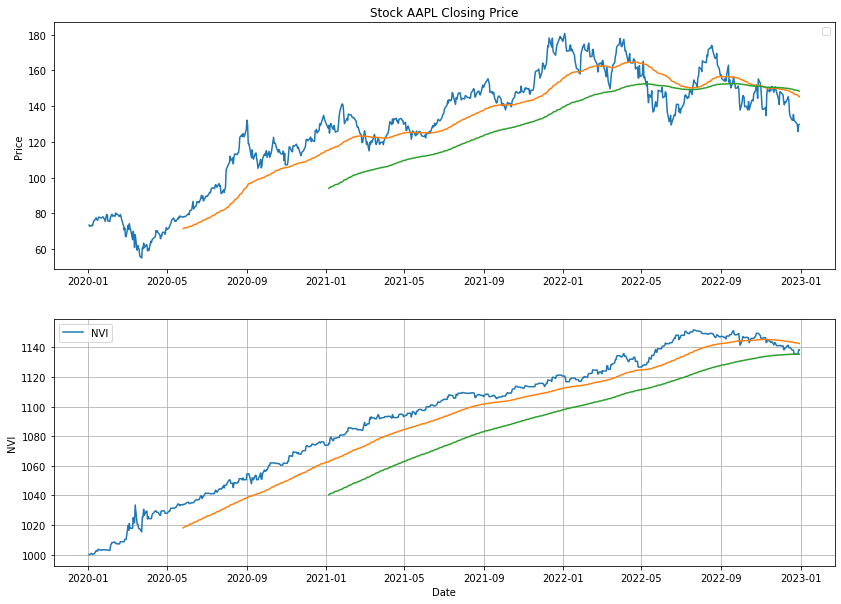

In [8]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df['Adj Close'])
ax1.plot(df['EMA_100'])
ax1.plot(df['EMA_255'])
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')
ax1.legend(loc='best')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['NVI_Cumulative'], label='NVI')
ax2.plot(df['NVI_100'])
ax2.plot(df['NVI_255'])
ax2.grid()
ax2.legend(loc='best')
ax2.set_ylabel('NVI')
ax2.set_xlabel('Date')

## Candlestick with NVI

In [9]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,NVI_Value,NVI_Cumulative,EMA_100,EMA_255,NVI_100,NVI_255,VolumePositive
0,18263.208333,74.059998,75.150002,73.797501,75.087502,73.449394,135480400,0.000000,1000.000000,NaN,NaN,NaN,NaN,False
1,18264.208333,74.287498,75.144997,74.125000,74.357498,72.735321,146322800,0.000000,1000.000000,NaN,NaN,NaN,NaN,False
2,18267.208333,73.447502,74.989998,73.187500,74.949997,73.314880,118387200,0.796806,1000.796806,NaN,NaN,NaN,NaN,False
3,18268.208333,74.959999,75.224998,74.370003,74.597504,72.970085,108872000,-0.470294,1000.326512,NaN,NaN,NaN,NaN,False
4,18269.208333,74.290001,76.110001,74.290001,75.797501,74.143890,132079200,0.000000,1000.326512,NaN,NaN,NaN,NaN,False


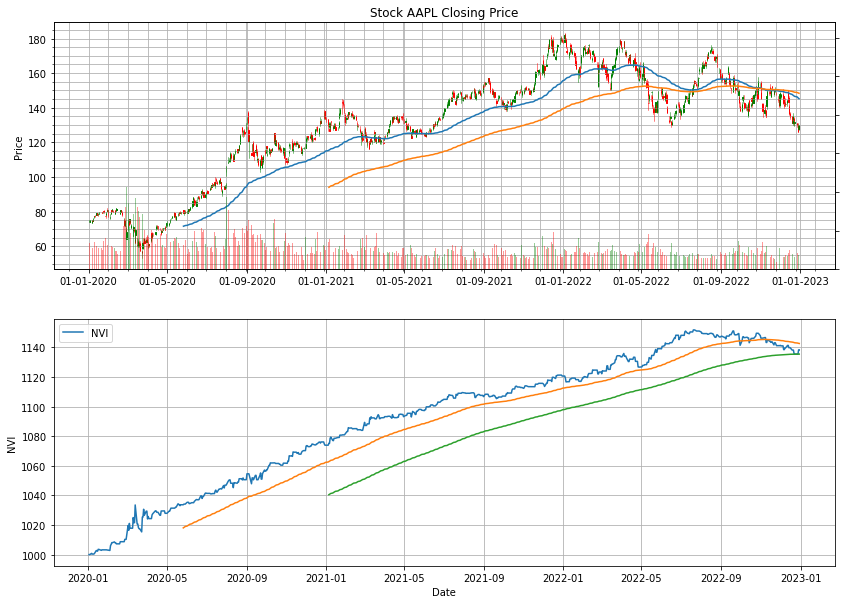

In [11]:
from mpl_finance import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.plot(df['EMA_100'])
ax1.plot(df['EMA_255'])
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax2.legend(loc='best')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['NVI_Cumulative'], label='NVI')
ax2.plot(df['NVI_100'])
ax2.plot(df['NVI_255'])
ax2.grid()
ax2.set_ylabel('NVI')
ax2.set_xlabel('Date')
ax2.legend(loc='best')